## **THE SPARKS FOUNDATION**

## TASK 1 - Prediction using Supervised ML

## To Predict the percentage of marks of the students based on the number of hours they studied

Author - **PRATEEK SHARMA**

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
print("The dimension of the dataframe is", end= ' ')
data.shape

The dimension of the dataframe is 

(25, 2)

In [ ]:
# Check if there any null value in the Dataset
data.isnull == True

False

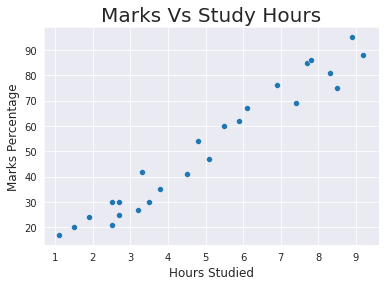

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

***From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.***

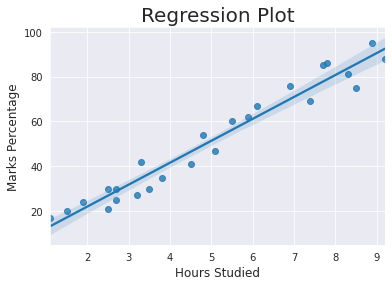

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

***It is confirmed that the variables are positively correlated.***

# **Training the Model**

**1.  Splitting the Data**


In [ ]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

**2.   Fitting the Data into the model**



In [ ]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model Trained Successfully")

Model Trained Successfully


## **Predicting the Percentage of Marks**

In [ ]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## **Comparing the Predicted Marks with the Actual Marks**

In [ ]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## **Visually Comparing the Predicted Marks with the Actual Marks**

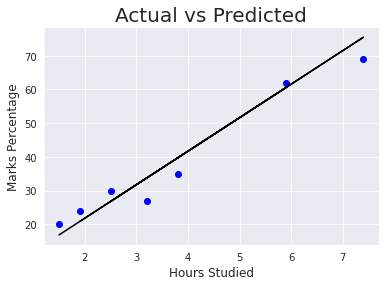

In [ ]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## **Evaluating the Model**

In [ ]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


***Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.***

## **What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [ ]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


 ***According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.***